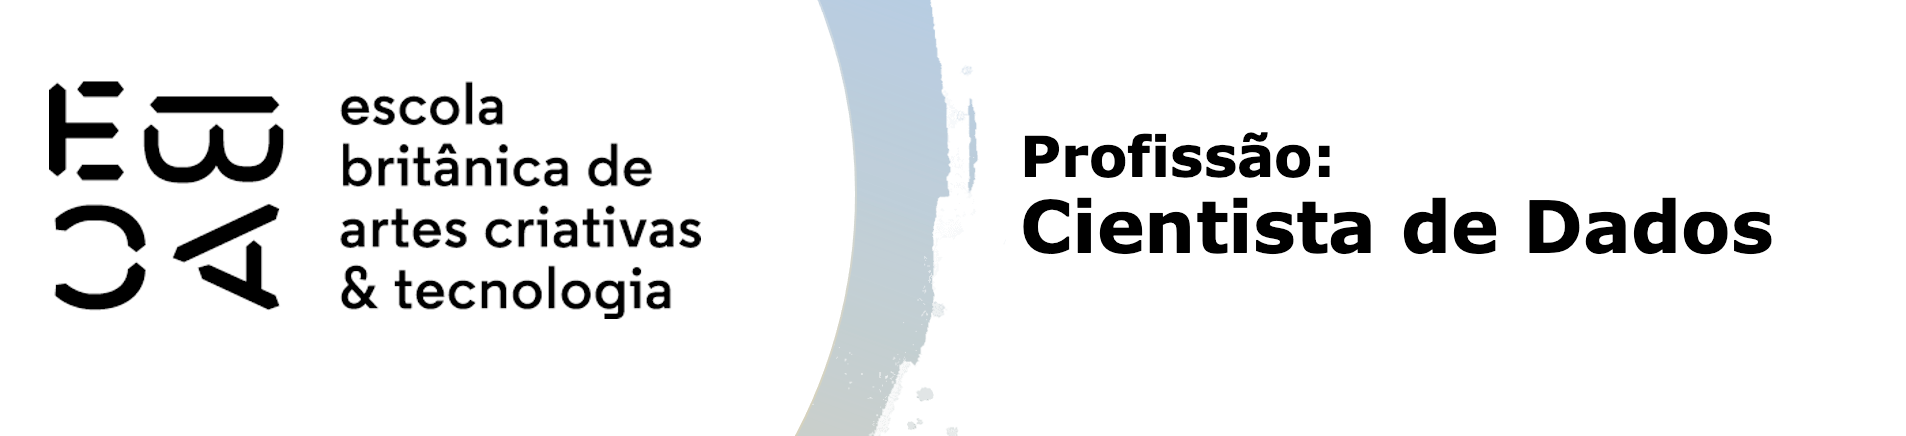


# **Módulo 36** | Descritiva IV
Caderno de **exercício 01**<br>



## Discente: Samuel Saturno

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

### Importando as Bibliotecas 

In [1]:
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np

/home/sos/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Carregando o DataFrame

In [2]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


### Organização do DataFrame 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187646 entries, 0 to 187645
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CNPJ emit.           187646 non-null  object        
 1   Emitente             187646 non-null  object        
 2   No.                  187646 non-null  int64         
 3   Data Emissão         187646 non-null  datetime64[ns]
 4   Valor NF             187646 non-null  float64       
 5   Data Registro        187646 non-null  datetime64[ns]
 6   Créditos             187646 non-null  float64       
 7   Situação do Crédito  187646 non-null  category      
 8   Ano                  187646 non-null  int64         
 9   Semestre             187646 non-null  int64         
 10  Retorno              186666 non-null  float64       
 11  flag_credito         187646 non-null  int64         
 12  categoria            187646 non-null  object        
dtypes: category(1)

## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [4]:
# Define a coluna 'Data Emissão' como índice do DataFrame
df.set_index('Data Emissão', inplace=True)

# Filtra os dados do DataFrame a partir de 1º de janeiro de 2020
df_2020 = df['2020-01-01':]

# Remove todas as linhas com valores NaN
df_2020.dropna(inplace=True)

# Redefine o índice do DataFrame, transformando o índice atual em uma coluna normal
df_2020.reset_index(inplace=True)

# Exibe as primeiras 5 linhas do DataFrame resultante
df_2020.head()

,Data Emissão,CNPJ emit.,Emitente,No.,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,2020-01-01,05.234.750/0001-41,TX BURGER LTDA,77882,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido
1,2020-01-01,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado
2,2020-01-01,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos
3,2020-01-01,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia
4,2020-01-01,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes


In [5]:
# Exibir os valores mínimos 
print(df_2020['Data Emissão'].min())

# Exibir os valores máximos 
print(df_2020['Data Emissão'].max())

2020-01-01 00:00:00
2021-12-31 00:00:00


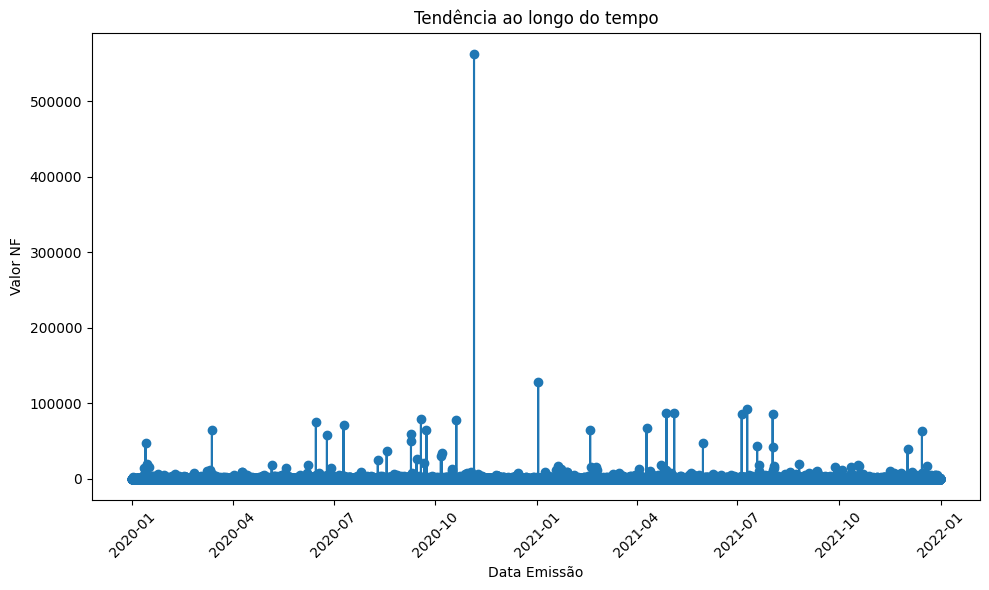

/tmp/ipykernel_8589/743485758.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_2020.resample('M').sum(numeric_only=True)


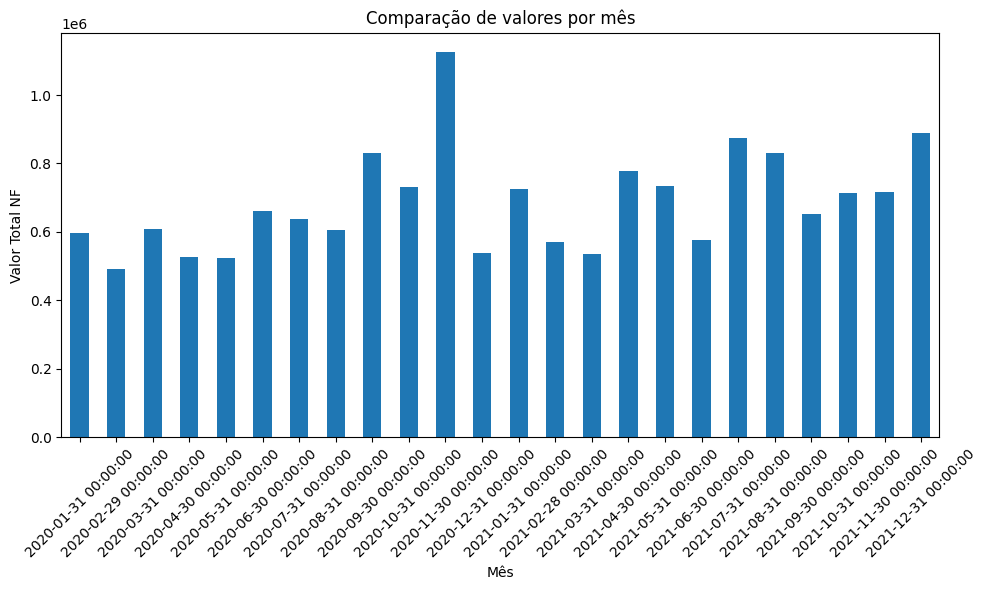

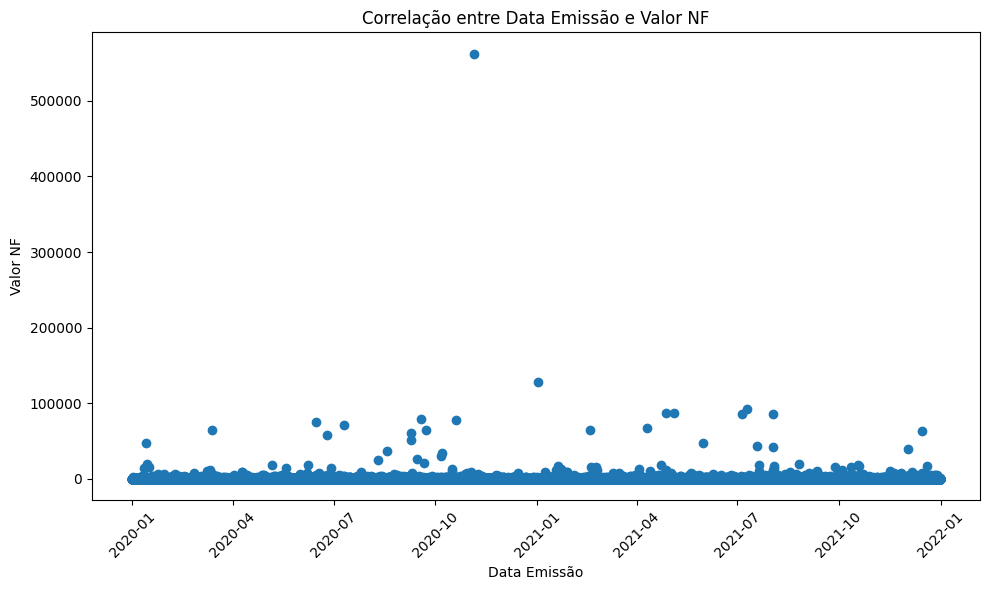

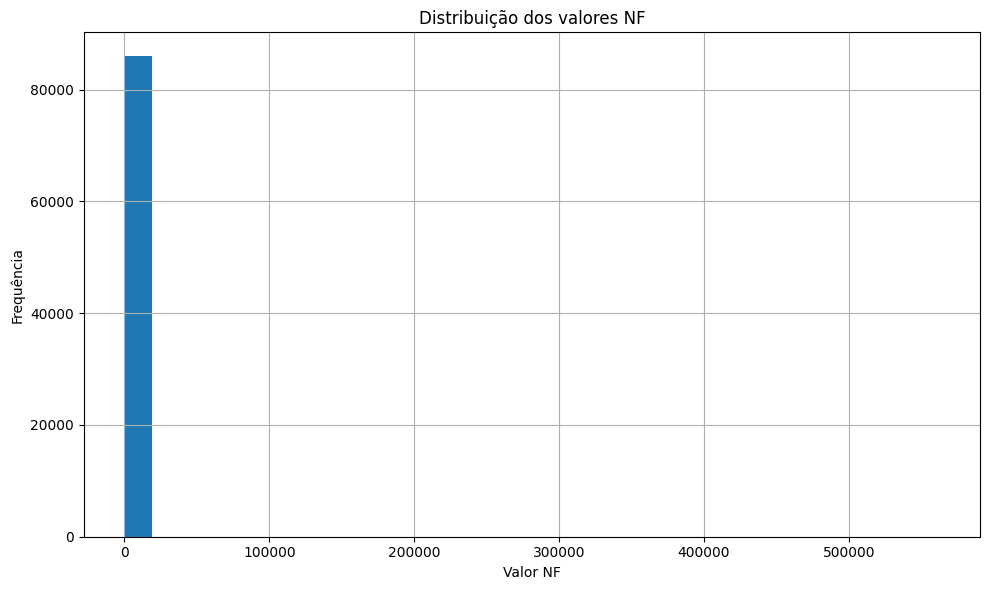

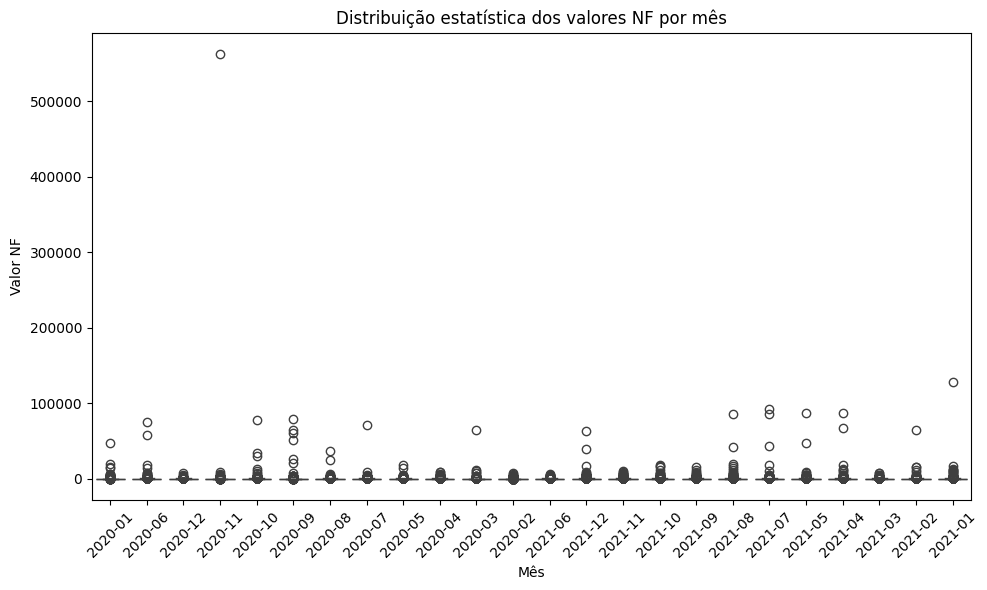

In [7]:
# 1. Gráfico de Linha (Line Plot)
plt.figure(figsize=(10, 6))
plt.plot(df_2020['Data Emissão'], df_2020['Valor NF'], marker='o')
plt.title('Tendência ao longo do tempo')
plt.xlabel('Data Emissão')
plt.ylabel('Valor NF')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Gráfico de Barras (Bar Plot) - Agrupado por mês
df_2020['Data Emissão'] = pd.to_datetime(df_2020['Data Emissão'])
df_2020.set_index('Data Emissão', inplace=True)
df_monthly = df_2020.resample('M').sum(numeric_only=True)

plt.figure(figsize=(10, 6))
df_monthly['Valor NF'].plot(kind='bar')
plt.title('Comparação de valores por mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total NF')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Gráfico de Dispersão (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(df_2020.index, df_2020['Valor NF'])
plt.title('Correlação entre Data Emissão e Valor NF')
plt.xlabel('Data Emissão')
plt.ylabel('Valor NF')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Histograma (Histogram)
plt.figure(figsize=(10, 6))
df_2020['Valor NF'].hist(bins=30)
plt.title('Distribuição dos valores NF')
plt.xlabel('Valor NF')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# 5. Box Plot - Agrupado por mês
df_2020['month'] = df_2020.index.to_period('M')
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Valor NF', data=df_2020)
plt.title('Distribuição estatística dos valores NF por mês')
plt.xlabel('Mês')
plt.ylabel('Valor NF')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [9]:
# Cria uma tabela de contingência (crosstab) que mostra a frequência de ocorrência 
# de cada combinação única de 'categoria' e 'flag_credito' no DataFrame df_2020
# A tabela inclui margens (totais) para cada linha e coluna, com o nome 'total' para esses totais
tab = pd.crosstab(df_2020.categoria, df_2020.flag_credito, margins=True, margins_name='total')

# Calcula as odds (razão de chances) para cada categoria
# Odds é calculado como a razão entre a contagem de flag_credito igual a 1 e a contagem de flag_credito igual a 0
tab['odds'] = tab[1] / tab[0]

# Calcula o odds ratio para cada categoria
# Odds ratio é a razão entre as odds de cada categoria e as odds totais
tab['odds_ratio'] = tab['odds'] / tab.loc['total', 'odds']

# Calcula o Weight of Evidence (WoE) para cada categoria
# WoE é o logaritmo natural do odds ratio
tab['woe'] = np.log(tab.odds_ratio)

# Exibe a tabela resultante com as colunas adicionais calculadas
tab


flag_credito,0,1,total,odds,odds_ratio,woe
categoria,,,,,,
Alimentos,1608,3442,5050,2.140547,2.792382,1.026895
Auto posto,405,135,540,0.333333,0.434839,-0.832779
Construção,8521,7523,16044,0.882878,1.151730,0.141265
Farmácia,6607,3582,10189,0.542152,0.707247,-0.346375
Mercado,14376,13177,27553,0.916597,1.195717,0.178746
Restaurantes,553,1626,2179,2.940325,3.835707,1.344354
Varejo,3481,701,4182,0.201379,0.262702,-1.336733
Vestuário,1472,443,1915,0.300951,0.392596,-0.934974
não definido,11659,6689,18348,0.573720,0.748428,-0.289780


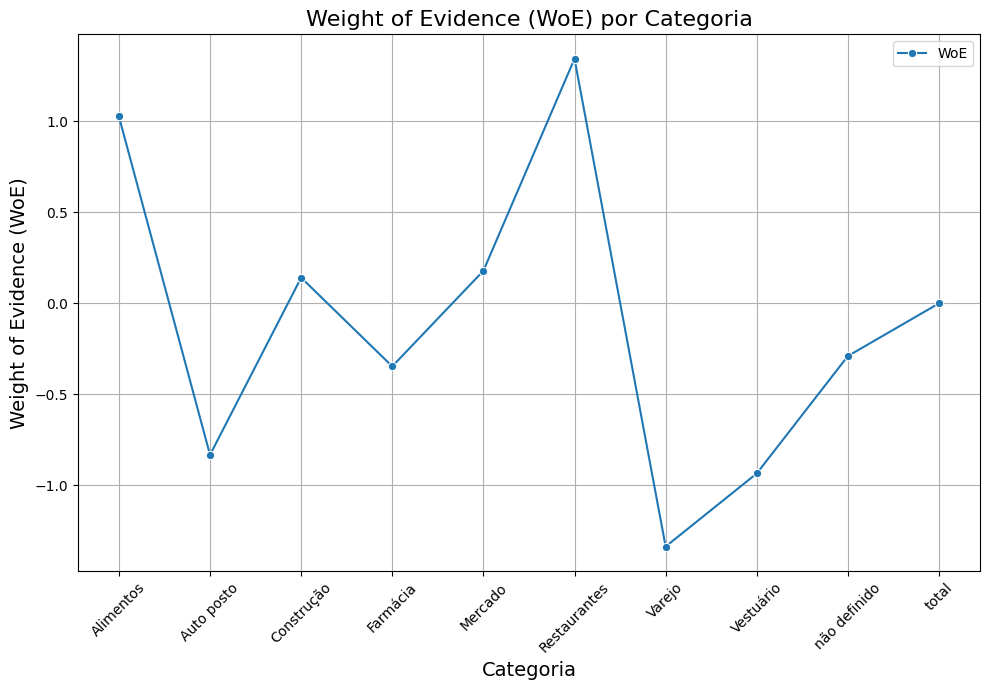

In [10]:
# Cria uma figura e um conjunto de eixos para o gráfico, especificando o tamanho da figura
fig, ax = plt.subplots(figsize=(10, 7))

# Cria um gráfico de linha usando seaborn
# Especifica o conjunto de eixos (ax) onde o gráfico será desenhado
# 'data=tab' indica que os dados a serem plotados estão na tabela 'tab'
# 'x='categoria'' define que os valores do eixo x serão as categorias
# 'y='woe'' define que os valores do eixo y serão os valores de Weight of Evidence (WoE)
# 'marker='o'' adiciona marcadores circulares nos pontos de dados do gráfico
sns.lineplot(ax=ax, data=tab, x='categoria', y='woe', marker='o')

# Título do gráfico
ax.set_title('Weight of Evidence (WoE) por Categoria', fontsize=16)

# Rótulo do eixo x
ax.set_xlabel('Categoria', fontsize=14)

# Rótulo do eixo y
ax.set_ylabel('Weight of Evidence (WoE)', fontsize=14)

# Ajusta a rotação dos rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Adiciona uma grade ao gráfico para melhor visualização dos dados
ax.grid(True)

# Adiciona uma legenda
ax.legend(['WoE'])

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()


<span style="color:blue">
    
### Análise dos Resultados de Odds, Odds Ratio e Weight of Evidence (WoE)

Os cálculos de Odds, Odds Ratio e Weight of Evidence (WoE) fornecem uma visão detalhada sobre a discriminação entre as categorias. Aqui estão algumas conclusões baseadas nos resultados obtidos:

#### Conclusões:

1. **Categoria "Restaurantes"**:
   - **Odds**: 2.940325, indicando que os eventos são quase três vezes mais prováveis do que os não eventos nesta categoria.
   - **Odds Ratio**: 3.835707, comparado com a média geral, essa categoria tem um risco significativamente maior de eventos.
   - **WoE**: 1.344354, sugerindo uma alta discriminação positiva nesta categoria.

2. **Categoria "Alimentos"**:
   - **Odds**: 2.140547, indicando que os eventos são mais do que duas vezes mais prováveis do que os não eventos nesta categoria.
   - **Odds Ratio**: 2.792382, mostrando um risco consideravelmente maior de eventos em comparação com a média geral.
   - **WoE**: 1.026895, indicando uma discriminação positiva nesta categoria.

3. **Categoria "Varejo"**:
   - **Odds**: 0.201379, indicando que os não eventos são mais comuns do que os eventos nesta categoria.
   - **Odds Ratio**: 0.262702, mostrando um risco significativamente menor de eventos em comparação com a média geral.
   - **WoE**: -1.336733, sugerindo uma alta discriminação negativa nesta categoria.

4. **Categoria "Auto posto"**:
   - **Odds**: 0.333333, indicando que os não eventos são três vezes mais comuns do que os eventos.
   - **Odds Ratio**: 0.434839, mostrando um risco menor de eventos em comparação com a média geral.
   - **WoE**: -0.832779, indicando uma discriminação negativa nesta categoria.

5. **Categoria "Farmácia"**:
   - **Odds**: 0.542152, indicando que os não eventos são mais comuns do que os eventos.
   - **Odds Ratio**: 0.707247, mostrando um risco menor de eventos em comparação com a média geral.
   - **WoE**: -0.346375, sugerindo uma discriminação ligeiramente negativa nesta categoria.

6. **Categoria "Mercado"**:
   - **Odds**: 0.916597, indicando uma proporção equilibrada entre eventos e não eventos.
   - **Odds Ratio**: 1.195717, mostrando um risco ligeiramente maior de eventos em comparação com a média geral.
   - **WoE**: 0.178746, indicando uma discriminação positiva leve nesta categoria.

7. **Categoria "não definido"**:
   - **Odds**: 0.573720, indicando que os não eventos são mais comuns do que os eventos.
   - **Odds Ratio**: 0.748428, mostrando um risco ligeiramente menor de eventos em comparação com a média geral.
   - **WoE**: -0.289780, sugerindo uma discriminação ligeiramente negativa nesta categoria.
</span>


## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [11]:
# Cria uma tabela de contingência (crosstab) que mostra a frequência de ocorrência 
# de cada combinação única de 'categoria' e 'flag_credito' no DataFrame df_2020
# A tabela inclui margens (totais) para cada linha e coluna, com o nome 'total' para esses totais
tab = pd.crosstab(df_2020.categoria, df_2020.flag_credito, margins=True, margins_name='total')

# Define os rótulos para os eventos e não eventos com base nas colunas da tabela
rotulo_evento = tab.columns[0]
rotulo_nao_evento = tab.columns[1]

# Calcula a porcentagem de eventos (flag_credito) para cada categoria
# Dividindo a contagem de eventos pela contagem total de eventos
tab['pct_evento'] = tab[rotulo_evento] / tab.loc['total', rotulo_evento]

# Calcula a porcentagem de não eventos (flag_credito) para cada categoria
# Dividindo a contagem de não eventos pela contagem total de não eventos
tab['pct_nao_evento'] = tab[rotulo_nao_evento] / tab.loc['total', rotulo_nao_evento]

# Calcula o Weight of Evidence (WoE) para cada categoria
# WoE é o logaritmo natural da razão entre pct_evento e pct_nao_evento
tab['woe'] = np.log(tab.pct_evento / tab.pct_nao_evento)

# Calcula o Information Value (IV) parcial para cada categoria
# IV parcial é calculado como (pct_evento - pct_nao_evento) * WoE
tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento) * tab.woe

# Imprime a soma do IV parcial, que é o Information Value total
print(tab.iv_parcial.sum())

# Exibe a tabela resultante com as colunas adicionais calculadas
tab


0.24096448519764424


flag_credito,0,1,total,pct_evento,pct_nao_evento,woe,iv_parcial
categoria,,,,,,,
Alimentos,1608,3442,5050,0.033031,0.092234,-1.026895,0.060796
Auto posto,405,135,540,0.008319,0.003618,0.832779,0.003916
Construção,8521,7523,16044,0.175034,0.201592,-0.141265,0.003752
Farmácia,6607,3582,10189,0.135718,0.095986,0.346375,0.013762
Mercado,14376,13177,27553,0.295304,0.353100,-0.178746,0.010331
Restaurantes,553,1626,2179,0.011359,0.043571,-1.344354,0.043304
Varejo,3481,701,4182,0.071505,0.018785,1.336733,0.070473
Vestuário,1472,443,1915,0.030237,0.011871,0.934974,0.017172
não definido,11659,6689,18348,0.239493,0.179243,0.289780,0.017459


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


<span style="color:blue">
    
#### Análise dos Resultados de Weight of Evidence (WoE) e Information Value (IV)

O cálculo de WoE e IV forneceu informações valiosas sobre a discriminação entre as categorias. Aqui estão algumas conclusões baseadas nos resultados obtidos:

#### Conclusões:

1. **Categoria "Restaurantes"**:
   - Possui um WoE negativo significativo (-1.344354), indicando que a proporção de eventos nesta categoria é muito menor em comparação com a proporção de não eventos.
   - Tem um IV parcial de 0.043304, o que sugere uma contribuição moderada para a discriminação total.

2. **Categoria "Alimentos"**:
   - Apresenta um WoE negativo (-1.026895), indicando que há uma menor proporção de eventos em comparação com a proporção de não eventos.
   - O IV parcial é 0.060796, também indicando uma contribuição moderada para a discriminação total.

3. **Categoria "Varejo"**:
   - Tem um WoE positivo alto (1.336733), indicando que a proporção de eventos é significativamente maior do que a proporção de não eventos.
   - O IV parcial é 0.070473, o que sugere uma contribuição significativa para a discriminação total.

4. **Categoria "Farmácia"**:
   - Apresenta um WoE positivo (0.346375), indicando uma maior proporção de eventos em comparação com a proporção de não eventos.
   - O IV parcial é 0.013762, indicando uma contribuição menor para a discriminação total.

5. **Categoria "Mercado"**:
   - Tem um WoE negativo (-0.178746), sugerindo que a proporção de eventos é ligeiramente menor do que a proporção de não eventos.
   - O IV parcial é 0.010331, indicando uma contribuição menor para a discriminação total.

6. **Categoria "não definido"**:
   - Possui um WoE positivo (0.289780), indicando uma maior proporção de eventos em comparação com a proporção de não eventos.
   - O IV parcial é 0.017459, indicando uma contribuição moderada para a discriminação total.

7. **Information Value Total**:
   - A soma do IV parcial para todas as categorias é 0.24096448519764424. Segundo a literatura, um IV entre 0.1 e 0.3 é considerado como uma discriminação "moderada" das categorias em relação aos eventos e não eventos.
</span>
